In [1]:
from bs4 import BeautifulSoup
import urllib
from urllib.request import urlopen
from fake_useragent import UserAgent
from selenium import webdriver
import requests
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [2]:
#Function to extract information 
def scrapper_media(imdb_link):
        
        ua = UserAgent()
        response=requests.get(imdb_link, {"User-Agent": ua.random})
        soup=BeautifulSoup(response.text,'lxml')
        
        if(re.search('https://www.imdb.com',imdb_link)):
            
            #Name
            for j in soup.select('#title-overview-widget > div.vital > div.title_block > div > div.titleBar > div.title_wrapper')[:1]:
                if(j):
                    print('Name:'+j.text.strip()[:20]+"\n\n")
                    
                    
            #Storyline
            for j in soup.select('#titleStoryLine div:nth-child(3) p span'):
                if(j):
                    print('Storyline:\n'+j.text.strip()+"\n\n")
                
            #Rating
            for k in soup.select('#title-overview-widget div.vital div.title_block div div.ratings_wrapper div.imdbRating div strong span'):
                if(k):
                    print("Rating:"+k.text+"\n\n")
                
            #Number of Seasons
            for i in soup.select('#title-episode-widget > div > div:nth-child(4)'):
                k=i.find_all('a')
                if(k):
                    for j in k[:1]:
                        print("Number of Seasons: "+j.text.strip()+'\n')
                        
                    
            #Number of Episodes    
            for k in soup.select('#title-overview-widget > div.vital > div.button_panel.navigation_panel > a > div > div > span'):
                if(k):
                    print("Number of episodes:"+k.text.strip()[:3]+"\n")
                    
                    
            #Episode Length
            for i in soup.select('#title-overview-widget > div.vital > div.title_block > div > div.titleBar > div.title_wrapper > div > time'):
                if(i):
                    print("Episode Length:"+i.text.strip()+"\n\n")
                
            #Poster    
            content=soup.find('div',class_='poster')
            if(content):
                co=content.find('a')
                co2=co.find('img')
                response = requests.get(co2['src'])
                img = Image.open(BytesIO(response.content))
                plt.imshow(img)
                
            #Genres        
            for k in soup.select('#title-overview-widget > div.vital > div.title_block > div > div.titleBar > div.title_wrapper > div'):
                if(k):
                    q=k.find_all('a')
                    print("Genres:\n")
                    for i in q[:-1]:
                        print(i.text)
                    print('\n')
                
            #Creators and Star Cast    
            content=soup.find('div',class_='plot_summary')
            if(content):
                for i in content.find_all('div',class_='credit_summary_item'):
                    j=i.find('h4')
                    if(j):
                        if((j.text.strip()=='Creator:')|(j.text.strip()=='Creators:')):
                            w=i.find_all('a')
                            print('Creator:')
                            for s in w:
                                if(s.text.strip()=='See full cast & crew'):
                                    break
                                else:
                                    print(s.text.strip())
                            print('\n')
                        elif(j.text.strip()=='Stars:'):
                            w=i.find_all('a')
                            print('Stars:')
                            for s in w:
                                if(s.text.strip()=='See full cast & crew'):
                                    break
                                else:
                                    print(s.text.strip())
                            print('\n')
                    else:
                        print('Not Available')
                
            
            #Release Data
            for i in soup.select('#titleDetails'):
                k=i.find_all('div',class_='txt-block')
                if(k):
                    for j in k[3:4]:
                        print(j.text.strip()[:40])
                    print('\n')
                
            #Trivia And Goofs    
            content=soup.find('div',id='titleDidYouKnow')
            if(content):
                trivia=content.find('div',id='trivia')
                if(trivia):
                    print("Trivia: "+trivia.text[7:-24].strip()+"\n")
                    
                goof=content.find('div',id="goofs")
                if(goof):
                    print('Goofs: '+goof.text[6:-24].strip()+"\n")
            
    
            #People also like    
            content3=soup.find('div',class_='rec_slide')
            if(content3):
                print('People also like: \n')
                for i in content3.find_all('div',class_='rec_item'):
                    j=i.find('a')
                    k=j.find('img')
                    print(k['alt'])
                print('\n\n')
            
            
            #Reviews    
            reviews=[]
            link2=imdb_link+'reviews?ref_=tt_urv'
            response2=requests.get(link2, {"User-Agent": ua.random})
            soup2=BeautifulSoup(response2.text,'lxml')
            content2=soup2.find('div',class_='lister-list')
            
            print('User Reviews: \n')
            if(content2):
                for i in content2.find_all('div',class_='review-container'):
                    j=i.find('div',class_='content')
                    print(j.text.strip())
                    reviews.append(j.text.strip())
            
            
            #Photos
            q=[]
            for i in soup.select('#titleImageStrip > div.mediastrip'):
                k=i.find_all('a')
                if(k):
                    for j in k:
                        a=j.find('img')
                        print(a['loadlate'])
                        q.append(a['loadlate'])

                else:
                    print('Not Available')
        else:
            print('Not Available')
    

In [3]:
def scrapper_star(imdb_link):
    
    ua = UserAgent()
    imdb_links=imdb_link[:-1]
    imdb_links2=imdb_links+'bio?ref_=nm_ov_bio_sm'
    response=requests.get(imdb_links2, {"User-Agent": ua.random})
    soup=BeautifulSoup(response.text,'lxml')
    response2=requests.get(imdb_links, {"User-Agent": ua.random})
    soup2=BeautifulSoup(response2.text,'lxml')
    
    if(re.search('https://www.imdb.com',imdb_links)):

        #Name and picture
        content=soup.find('div',class_='subpage_title_block name-subpage-header-block')
        if(content):
            a=content.find('a')
            im=a.find('img')
            k=im['src']
            response = requests.get(k)
            img = Image.open(BytesIO(response.content))
            plt.imshow(img)
                    
        #Title   
        title=content.find('div',class_='parent')
        if(title):
            print("Name: "+title.text.strip()+'\n')
          

        #Overview
        content2=soup.find('table',class_='dataTable labelValueTable')
        if(content2):
            for i in content2.find_all('tr'):
                #print(":")
                j=i.text.strip()
                j=j.replace('\n'," ").replace('    ',' ')
                print(j)
            print('\n\n')
            

        #Bio
        content3=soup.find('div',class_='soda odd')
        p=content3.find('p')
        if(p):
            print(p.text.strip())
            print('\n\n')
        
        #Spouse
        content4=soup.find('table',id='tableSpouses')
        if(content4):

            for i in content4.find_all('tr'):
                j=i.find('td')
                print("Spouse: "+j.text.strip()+"\n\n")

        #Known For
        content5=soup2.find('div',id='knownfor')
        if(content5):
            print('Known For: ')
            for i in content5.find_all('div',class_='knownfor-title'):
                j=i.find('div',class_='knownfor-title-role')
                k=j.find('a')
                print(k['title'])
            print('\n\n')


        #Awards Won
        link=imdb_links+'awards?ref_=nm_awd'
        response=requests.get(link, {"User-Agent": ua.random})
        soup4=BeautifulSoup(response.text,'lxml')
        content7=soup4.find('div',class_='article listo')
        if(content7):
            q=[]
            for i in content7.find_all('table',class_='awards'):
                a=i.find_all('tr')
                for j in a:
                    k=j.find_all('td')
                    row=[w.text for w in k]
                    q.append(row)
            df=pd.DataFrame(q)
            #print(q)
            df[0]=df[0].str.replace('\n','')
            df[1]=df[1].str.replace('\n',' ')
            df[2]=df[2].str.replace('\n',' ')
            df=df[df[1].str.contains('Winner',na=False)]
            df=df.reset_index()
            df.drop('index',axis=1,inplace=True)
            df.columns=['Year','Award',"Category"]
            df['Award']=df['Award'].apply(lambda x: x[7:])
            #print(df)
            with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
                print(df)

In [52]:
def episode_guide(link):
    ua = UserAgent()
    response=requests.get(link, {"User-Agent": ua.random})
    soup=BeautifulSoup(response.text,'lxml')
    seasons=0

    for i in soup.select('#title-episode-widget > div > div:nth-child(4)'):
        k=i.find_all('a')
        if(k):
            for j in k[:1]:
                seasons=int(j.text.strip())
        else:
            seasons=0

    if(seasons):
        for i in range(seasons):
            #link='https://www.imdb.com/title/tt0903747/'
            link_=link+'episodes?season={}'.format(i)
            response=requests.get(link_, {"User-Agent": ua.random})
            soup=BeautifulSoup(response.text,'lxml')

            content=soup.find('div',class_='clear')
            season_no=content.find('h3',id='episode_top')
            print(season_no.text.strip()+'\n')

            content2=content.find('div',class_='list detail eplist')

            for j in content2.find_all('div',class_='list_item odd'):
                    title=j.find('strong')
                    title_name=title.find('a')
                    print('Episode Name: '+title_name['title']+"\t")

                    rating=j.find('div',class_='ipl-rating-widget')
                    if(rating):
                        rating_=rating.find('div',class_='ipl-rating-star small')
                        if(rating_):
                            rating_1=rating_.find('span',class_='ipl-rating-star__rating')
                            if(rating_1):
                                print('Rating: '+rating_1.text.strip()+'\t')

                    date=j.find('div',class_='airdate')
                    if(date):
                        print("Date Aired: "+date.text.strip()+'\t')

                    summary=j.find('div',class_='item_description')
                    if(summary):
                        print('Summary: '+summary.text.strip()+"\n")


            for j in content2.find_all('div',class_='list_item even'):
                    title=j.find('strong')
                    if(title):
                        title_name=title.find('a')
                        print('Episode Name: '+title_name['title']+"\t")

                    rating=j.find('div',class_='ipl-rating-widget')
                    if(rating):
                        rating_=rating.find('div',class_='ipl-rating-star small')
                        if(rating_):
                            rating_1=rating_.find('span',class_='ipl-rating-star__rating')
                            if(rating_1):
                                print('Rating: '+rating_1.text.strip()+'\t')

                    date=j.find('div',class_='airdate')
                    if(date):
                        print("Date Aired: "+date.text.strip()+'\t')

                    summary=j.find('div',class_='item_description')
                    if(summary):
                        print('Summary: '+summary.text.strip()+"\n")

    else:
        print('No guide as it is a movie')


In [53]:
def link_extract(name):
    query = name
    
    query = urllib.parse.quote_plus(query) # Format into URL encoding
    number_result = 1
    ua = UserAgent()
    google_url = "https://www.google.com/search?q=" + query +"imdb"+"&num=" + str(number_result)
    response = requests.get(google_url, {"User-Agent": ua.random})
    soup = BeautifulSoup(response.text, "html.parser")
    result_div = soup.find_all('div', attrs = {'class': 'ZINbbc'})
    for r in result_div:
        # Checks if each element is present, else, raise exception
        try:
            link = r.find('a', href = True)
            title = r.find('div', attrs={'class':'vvjwJb'}).get_text()
            #description = r.find('div', attrs={'class':'s3v9rd'}).get_text()
            # Check to make sure everything is present before appending
            if link != '':
                imdb_links=link['href'][7:44]
                #print(imdb_links)
                #titles.append(title)
                #descriptions.append(description)
                # Next loop if one element is not present
                break
        except:
            continue
    return imdb_links


In [54]:
data_media={}
data_star={}

In [55]:
data_media = json.load(open("data_media.txt"))
data_star = json.load(open("data_star.txt"))

In [56]:
type(data_media)

dict

Media(m) or Star(s)m
Enter Name: fargo
Name:Fargo             




Storyline:
The all new "true crime" case of Fargo's new chapter travels back to 1979 in Sioux Falls, South Dakota and Luverne, Minnesota, where a young State Police Officer Lou Solverson, recently back from Vietnam, investigates a case involving a local crime gang and a major Mob syndicate. Helping him piece things together is his father-in-law, Sheriff Hank Larsson. The investigation will lead them to a colorful cast of characters that includes Karl Weathers, the town lawyer of Luverne, Minnesota. A Korean War vet, Karl is a flowery drunk blessed with the gift of gab and the eloquence of a true con artist. Joe Bulo, the front man for the northern expansion of a Kansas City crime syndicate. The new face of corporate crime, Joe's bringing a Walmart mentality to small town America. His number two is Mike Milligan. Part enforcer, part detective, Mike is always smiling - but the joke is usually on you. Bulo and his crew hav

Want the episode guide (y/n)y
Season 4

Episode Name: Episode #4.1	
Date Aired: 19 Apr. 2020	
Summary: The head of an African American crime syndicate goes to war with the Italian mafia in Kansas City, Missouri during the 1950s

Episode Name: Episode #4.3	
Date Aired: 2020	
Summary: Know what this is about?
 Be the first one to add a plot.

Episode Name: Episode #4.5	
Date Aired: 2020	
Summary: Know what this is about?
 Be the first one to add a plot.

Episode Name: Episode #4.7	
Date Aired: 2020	
Summary: Know what this is about?
 Be the first one to add a plot.

Episode Name: Episode #4.9	
Date Aired: 2020	
Summary: Know what this is about?
 Be the first one to add a plot.

Episode Name: Episode #4.2	
Date Aired: 19 Apr. 2020	
Summary: Know what this is about?
 Be the first one to add a plot.

Episode Name: Episode #4.4	
Date Aired: 2020	
Summary: Know what this is about?
 Be the first one to add a plot.

Episode Name: Episode #4.6	
Date Aired: 2020	
Summary: Know what this is about?

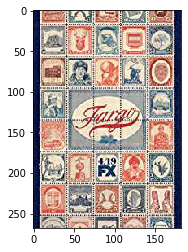

In [57]:
scrapper=input('Media(m) or Star(s)')
if(scrapper=='m'):
    name=input('Enter Name: ')
    imdb_link=link_extract(name)
    
    if(data_media.get(name)==None):
        imdb_link=link_extract(name)
        data_media[name]=imdb_link        
        scrapper_media(imdb_link)
        c=input('Want the episode guide (y/n)')
        if(c=='y'):
            episode_guide(imdb_link)
        else:
            print('Bye')
    else:
        imdb_link=data_media[name]
        scrapper_media(imdb_link)
        if(c=='y'):
            episode_guide(imdb_link)
        else:
            print('Bye')
        
elif(scrapper=='s'):
    name=input('Enter Name: ')
    if(data_star.get(name)==None):
        imdb_link=link_extract(name)
        data_star[name]=imdb_link        
        scrapper_star(imdb_link)
    else:
        imdb_link=data_star[name]
        scrapper_star(imdb_link)
        
elif(scrapper=='e'):
    print('Bye..')
    #break
else:
    print('wrong input')
    #break

In [ ]:
json.dump(data_media, open("data_media.txt",'w'))

json.dump(data_star, open("data_star.txt",'w'))

In [ ]:
data_media

In [ ]:
data_star